In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import minmax_scale

from scipy.stats import norm

# Download the date
https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip


In [125]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip

In [126]:
# !unzip codon_usage.csv.zip

# Data Preprocessing

In [127]:
def read_data(file_name):
    """
    Reads in a csv file and returns a dataframe
    """
    return pd.read_csv(file_name, low_memory=False)

dataset = read_data('codon_usage.csv')
df = dataset.copy()

In [128]:
# dataset = read_data('codon_usage.csv')
dataset.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [129]:
dataset

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [130]:
# dataset.dropna(inplace=True)

dataset['Kingdom'].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [131]:
print(dataset.isnull().sum())

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64


<AxesSubplot:>

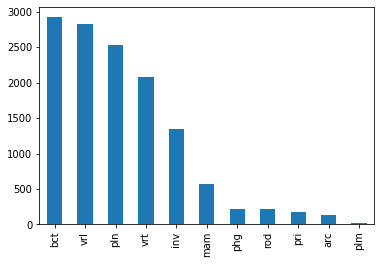

In [132]:
dataset['Kingdom'].value_counts().plot(kind='bar')

In [133]:
classes_dict = {    'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
                    'pln': 4, 'inv': 5, 'vrt': 6, 'mam': 7,
                    'rod': 8, 'pri': 9, 'vrl':10
                }

In [134]:
dataset['Kingdom'] = dataset['Kingdom'].map(classes_dict)

In [135]:
# dataset['Kingdom'].value_counts().plot(kind='bar')

In [136]:
dataset = dataset.drop(dataset[dataset['SpeciesID']==353569].index)
dataset = dataset.drop(dataset[dataset['SpeciesID']==1238].index)


In [137]:
dataset['UUU'] = dataset['UUU'].astype(float)
dataset['UUC'] = dataset['UUC'].astype(float)
# dataset = minmax_scale(dataset)
cols = dataset.select_dtypes(np.number).columns

num_columns_list = list(cols)
# num_columns_list

num_columns_list.remove('Kingdom')
num_columns_list.remove('DNAtype')
num_columns_list.remove('SpeciesID')
num_columns_list.remove('Ncodons')
# num_columns_list

In [138]:
# for num_column in num_columns_list:
#     dataset[num_column] = minmax_scale(dataset[num_column])

dataset.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,10,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,10,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,10,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,10,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,10,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [139]:
X = dataset.iloc[:, 5:].values.astype(float)
y = dataset.iloc[:, 0]

In [140]:
X

array([[0.01654, 0.01203, 0.0005 , ..., 0.00251, 0.0005 , 0.     ],
       [0.02714, 0.01357, 0.00068, ..., 0.00271, 0.00068, 0.     ],
       [0.01974, 0.0218 , 0.01357, ..., 0.00391, 0.     , 0.00144],
       ...,
       [0.01423, 0.03321, 0.01661, ..., 0.00356, 0.00119, 0.02017],
       [0.01757, 0.02028, 0.00767, ..., 0.00099, 0.00079, 0.00156],
       [0.01778, 0.03724, 0.01732, ..., 0.00156, 0.00114, 0.02161]])

In [141]:
class DataGenerator:

    def __init__(self, X, y, sampleSize=16):
        self.X = X
        self.y = y
        self.sampleSize = sampleSize
        if self.sampleSize <= 0 and self.sampleSize > len(self.X):
            return TypeError("sampleSize must be between 0 and ", len(X))



    def split_data(self, test_size=0.3, random_state=1):
        self.X_train, self.X_rem, self.y_train, self.y_rem = tts(self.X, self.y, test_size=test_size, random_state=random_state)
        self.X_test, self.X_val, self.y_test, self.y_val = tts(self.X_rem, self.y_rem, test_size=0.5, random_state=random_state)
        return self.X_train, self.X_test, self.y_train, self.y_test
    

In [142]:
X.shape

(13026, 64)

In [143]:
y.shape

(13026,)

In [144]:
data_generator = DataGenerator(y=y, X=X)
X_training, X_testing, y_training, y_testing = data_generator.split_data()

In [152]:
class MultiClassClassification:
  def __init__(self, X_train, X_test, y_train, y_test, laplace_smoothing_value, laplace, total_classes=11):
    self.laplace_smoothing_value = laplace_smoothing_value
    self.laplace = laplace
    self.total_classes = total_classes
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test
    self.graylist =[]
    self.laplaceProbabilitylist = []
    self.fitFeatures= []


  def fitDistribution(self, data):

    mean = np.mean(data) # mean of the data
    std = np.std(data) # standard deviation of the data

    dist = norm(mean, std) # create a normal distribution with the mean and standard deviation 

    return dist # return the distribution

  def evaluate(self, y, y_predicted, desired_class):
    '''

      Takes original classes and predicted classes as input

      Return the values of precision, recall and accuracy
    
    '''
    y = ( y==desired_class )
    y_predicted = ( y_predicted == desired_class)

    precision = (y&y_predicted).sum() / y_predicted.sum()
    recall = (y&y_predicted).sum() / y.sum()
    accuracy = (y==y_predicted).sum() / y.size


    return precision, recall, accuracy


  def laplaceSmoothing(self, classes, length):
    smooths = np.empty(self.total_classes, dtype=object) # create an empty list to store the smoothed values
    for i in range(length): 
      # add the laplace smoothing value to the class and divide by the size of the class plus the laplace smoothing value times the number of features
      smooths[i] = (classes[i] + self.laplace_smoothing_value) / ( (classes[i].size) + self.laplace_smoothing_value * self.n_features) 
    
    return smooths 



  # def probability(self, X, dist1, dist2, prior):
  #   return prior * ( dist1.pdf(X[0]) *  dist2.pdf(X[1]))


  def probability(self, data):

    py = np.ones(self.total_classes) # create an array of ones to store the probabilities


    for i in range(self.n_features):
      for j in range(self.total_classes):
        # if 'X'+str(i)+str(j) in self.graylist:
        #   print('already in graylist')
        #   print('X'+str(i)+ '' + str(j))
        # else:
        #   self.graylist.append('X'+str(i)+str(j))
          
        py[j] *= self.features['X'+str(i)+str(j)].pdf(data[i])
        

    for i in range(self.total_classes):
      py[i] *= self.prior[i]
    
    return  py



  def laplaceProbability(self, data):
    
    py = np.ones(11) # create an array of ones to store the probabilities
    pdf = np.ones(self.total_classes) # create an array of ones to store the PDF values

    for i in range(self.n_features):
      for j in range(self.total_classes):
        # print('laplaceProbability','i ', i, ' j ', j)
        # if 'X'+str(i)+str(j) in self.laplaceProbabilitylist:
        #   print('already in laplaceProbabilitylist')
        # else:
        #   self.laplaceProbabilitylist.append('X'+str(i)+str(j))
        pdf[j] *= self.features['X'+str(i)+str(j)].pdf(data[i])

      
      smooths = self.laplaceSmoothing(pdf, self.total_classes)
      for j in range(self.total_classes):
        py[j] *= smooths[j]
      
    for i in range(self.total_classes):
      py[i] *= self.prior[i]


    return py




  def fit(self):

    # self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()
    X_training_class = np.empty(self.total_classes, dtype=object)
    for i in range(self.total_classes):
      X_training_class[i] = self.X_train[self.y_train == i]

    self.prior = np.zeros(self.total_classes)
    for i in range(self.total_classes):
      print('setting prior', i)
      self.prior[i] = 1 - (len(X_training_class[i]) / len(self.X_train) )

    


    self.n_features = self.X_train.shape[1]
    # print('Number of features: ', self.n_features)
    self.features = {}
    

    for i in range(self.n_features):
      for j in range(self.total_classes):
        # print('fit features','i ', i, ' j ', j)
        # if 'X'+str(i)+str(j) in self.fitFeatures:
        #   print('already in features')
        # else:
        #   self.fitFeatures.append('X'+str(i)+str(j))
          
        self.features['X'+str(i)+str(j)] = self.fitDistribution(X_training_class[j][:,i])
  


  
  
  def predict(self):
    count = 0
    y_predicted = []
    y = []
    for sample, target in zip(self.X_test, self.y_test):

      if self.laplace:
        py = self.laplaceProbability(sample)
      
      else:
        py = self.probability(sample)

      # print("Model predicted class {} and truth was {}".format(np.argmax(py), target))
      y_predicted.append(np.argmax(py))
      y.append(target)
      # np.append(y_predicted, np.argmax([py0,py1]))
      # np.append(y, target)
      # y = target
      if np.argmax(py) != target :
        count+=1

    # precision, recall, accuracy = self.evaluate(y, y_predicted, desired_class=10)
    # print("precision:", precision)
    # print("recall:", recall)
    # print("accuracy:", accuracy)

    y_predicted = np.array(y_predicted)
    y = np.array(y)
    return y_predicted, y

In [153]:
clf = MultiClassClassification(X_train=X_training, y_train=y_training, X_test=X_testing, y_test=y_testing, laplace=False, total_classes=11, laplace_smoothing_value=0.5)

In [154]:
clf.fit()

setting prior 0
setting prior 1
setting prior 2
setting prior 3
setting prior 4
setting prior 5
setting prior 6
setting prior 7
setting prior 8
setting prior 9
setting prior 10


In [155]:
y, y_predicted = clf.predict()

In [156]:
import matplotlib.pyplot as plt

def draw_matrix(true_positive, false_positive, false_negative, true_negative):
  '''
    Draw a confusion matrix.
  '''
  matrix = np.array([[true_positive, false_negative], [false_positive, true_negative]])
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.inferno_r)
  plt.colorbar()
  plt.show()


def confusion_matrix(y, y_predicted, desired_class):
  '''
    Takes original classes and predicted classes as input
  '''
  actual = ( y == desired_class )

  predicted = ( y_predicted == desired_class )
  true_positive = (actual & predicted).sum()
  false_positive = (actual & ~predicted).sum()
  false_negative = (~actual & predicted).sum()
  true_negative = (~actual & ~predicted).sum()

  return true_positive, false_positive, false_negative, true_negative

In [157]:
for class_name in classes_dict.keys():
  print(class_name)
  print(dataset[dataset['Kingdom'] == int(classes_dict.get(class_name))]['Kingdom'].count())
  true_positive, false_positive, false_negative, true_negative = confusion_matrix(y, y_predicted, int(classes_dict.get(class_name)))
  # draw_matrix(true_positive= true_positive, true_negative= true_negative, false_positive= false_positive, false_negative= false_negative)
  print("true positive:", true_positive)
  print("false negative:", false_negative)
  print("false positive:", false_positive)
  print("true negative:", true_negative)
  print("Precision:", true_positive / (true_positive + false_positive))
  print("True Positive rate or Recall:", true_positive / (true_positive + false_negative))
  print("specificity, selectivity or True Negative Rate:", true_negative / (true_negative + false_positive))
  print("Accuracy:", (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative))
  print("Balanced accuracy:", (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative))
  # print("F1 score:", 2 * ( (true_positive / (true_positive + false_positive)) * (true_positive / (true_positive + false_negative))) / ((true_positive / (true_positive + false_positive)) + (true_positive / (true_positive + false_negative))) )
  # print("MCC:", ( (true_positive * true_negative) - (false_positive * false_negative) ) / ( (true_positive + false_positive) * (true_positive + false_negative) * (true_negative + false_positive) * (true_negative + false_negative) ) )
  print("\n")

arc
126
true positive: 16
false negative: 10
false positive: 90
true negative: 1838
Precision: 0.1509433962264151
True Positive rate or Recall: 0.6153846153846154
specificity, selectivity or True Negative Rate: 0.9533195020746889
Accuracy: 0.9488229273285568
Balanced accuracy: 0.9488229273285568


bct
2918
true positive: 166
false negative: 288
false positive: 133
true negative: 1367
Precision: 0.5551839464882943
True Positive rate or Recall: 0.3656387665198238
specificity, selectivity or True Negative Rate: 0.9113333333333333
Accuracy: 0.7845445240532242
Balanced accuracy: 0.7845445240532242


phg
220
true positive: 17
false negative: 13
false positive: 146
true negative: 1778
Precision: 0.10429447852760736
True Positive rate or Recall: 0.5666666666666667
specificity, selectivity or True Negative Rate: 0.9241164241164241
Accuracy: 0.9186284544524054
Balanced accuracy: 0.9186284544524054


plm
18
true positive: 1
false negative: 0
false positive: 89
true negative: 1864
Precision: 0.011

In [151]:
def original_accuracy(y, y_predicted):
  '''
    Takes original classes and predicted classes as input
  '''
  actual = ( y == y_predicted )
  return actual.sum() / len(y)

print(original_accuracy(y, y_predicted))

0.4150460593654043
